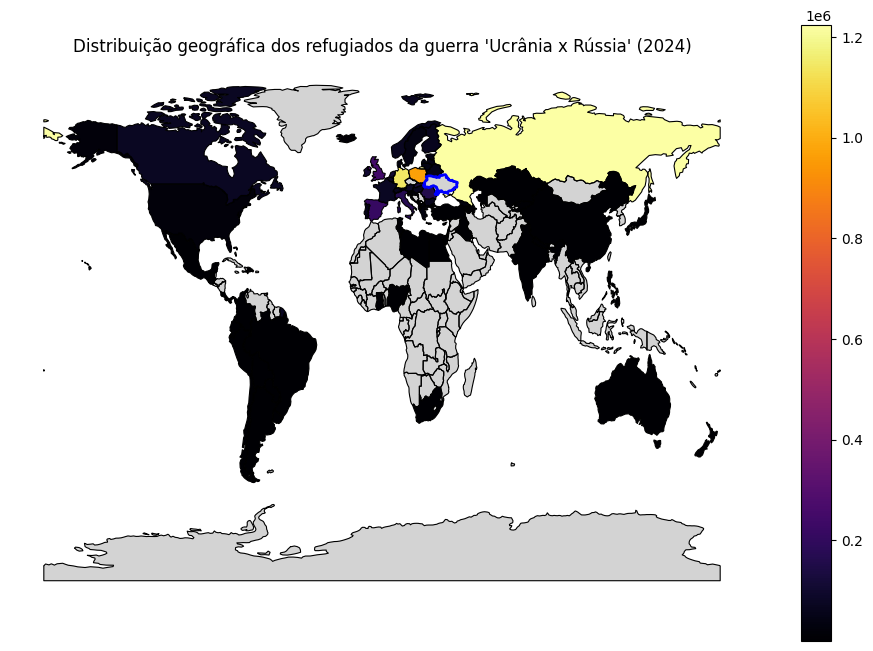

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar os dados dos refugiados
file_path = "/ukraine-russia-refugees-end2024.csv"
tabela = pd.read_csv(file_path)
tabela.columns = ["Country", "Refugees"]


url = "https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson"
mundo = gpd.read_file(url)

# Ajustar nomes dos países
tabela["Country"] = tabela["Country"].replace({
    "Russian Federation": "Russia",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Czechia": "Czech Republic"
})

# Unir os dados de refugiados com o mapa base
mundo = mundo.merge(tabela, how="left", left_on="NAME", right_on="Country")

# Criar o mapa coroplético
# Cor cinza = Países que não tem dados
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mundo.boundary.plot(ax=ax, linewidth=0.8, color="black")
mundo.plot(column="Refugees", ax=ax, cmap="inferno", legend=True, missing_kwds={
    "color": "lightgrey",
    "label": "Sem dados"
})

# Destacar a Ucrânia no mapa pra que seja possível localiza-la:
ucrania = mundo[mundo["NAME"] == "Ukraine"]
ucrania.boundary.plot(ax=ax, color="blue", linewidth=2)
ax.set_title("Distribuição geográfica dos refugiados da guerra 'Ucrânia x Rússia' (2024)", fontsize=12)

# Remover eixos
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

